In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from datetime import timedelta

In [2]:
plants = pd.read_csv('assessment_input.csv')
plants = plants.iloc[:,:-1]

In [3]:
plants.head()

,Time,PLANT,DOSE,A,B,C,D,E,F,G,H,I,J
0,28/04/2009 0:00,P04,77.2,5.6,120.0,86,37,7.23,7.8,6.55,17.4,501,3.5
1,28/04/2009 12:00,P04,77.2,5.6,120.0,86,37,7.23,7.8,6.55,17.4,501,3.5
2,29/04/2009 0:00,P04,77.2,5.6,120.0,86,37,7.23,7.8,6.55,17.9,501,3.5
3,29/04/2009 12:00,P04,77.2,5.6,120.0,86,37,7.23,7.8,6.55,18.0,501,3.5
4,30/04/2009 0:00,P04,77.2,5.6,120.0,89.5,37,7.23,7.8,6.55,18.0,469.5,3.5


In [4]:
plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44712 entries, 0 to 44711
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    44712 non-null  object 
 1   PLANT   44712 non-null  object 
 2   DOSE    44712 non-null  float64
 3   A       44712 non-null  object 
 4   B       44712 non-null  float64
 5   C       44712 non-null  object 
 6   D       44712 non-null  object 
 7   E       44712 non-null  float64
 8   F       44712 non-null  object 
 9   G       44712 non-null  object 
 10  H       44712 non-null  float64
 11  I       44712 non-null  object 
 12  J       44712 non-null  object 
dtypes: float64(4), object(9)
memory usage: 4.4+ MB


In [5]:
plants.describe()

,DOSE,B,E,H
count,44712.000000,44712.000000,44712.000000,44712.000000
mean,57.275624,72.756242,7.223361,13.819377
std,20.763421,21.850336,0.045644,4.760201
min,30.200000,21.300000,7.130000,5.200000
25%,45.200000,59.000000,7.200000,9.800000
50%,52.200000,66.000000,7.220000,13.800000
75%,62.200000,79.000000,7.240000,18.000000
max,177.200000,151.000000,8.000000,127.000000


In [6]:
plants['PLANT'].value_counts()

P04    5204
P01    5079
P09    5071
P07    5068
P05    5035
P10    4835
P08    4833
P03    4820
P06    4706
P02      61
Name: PLANT, dtype: int64

In [7]:
plants['Time'] = pd.to_datetime(plants['Time'], format='%d/%m/%Y %H:%M').dt.strftime('%Y-%m-%d %H:%M')
plants_name = plants['PLANT'].unique()
for p in plants_name:
    sub_date_time = plants[plants['PLANT'] == p]['Time']
    print('the plant %s: the start date %s and the end date %s' %(p, sub_date_time.min(), sub_date_time.max()))

the plant P04: the start date 2009-04-28 00:00 and the end date 2016-07-05 12:00
the plant P01: the start date 2009-06-28 12:00 and the end date 2016-07-05 12:00
the plant P05: the start date 2009-06-28 12:00 and the end date 2016-07-05 12:00
the plant P07: the start date 2009-06-28 12:00 and the end date 2016-07-05 12:00
the plant P09: the start date 2009-06-28 12:00 and the end date 2016-07-05 12:00
the plant P03: the start date 2009-10-30 12:00 and the end date 2016-07-05 12:00
the plant P08: the start date 2009-10-30 12:00 and the end date 2016-07-05 12:00
the plant P10: the start date 2009-10-30 12:00 and the end date 2016-07-05 12:00
the plant P06: the start date 2009-12-31 00:00 and the end date 2016-07-05 12:00
the plant P02: the start date 2016-06-05 12:00 and the end date 2016-07-05 12:00


In [8]:
# check #VALUE!

#plants.replace(to_replace='#VALUE!', value=np.nan, inplace=True) # using nan to replace '#VALUE!'
numeric_cols = ['DOSE', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
plants[numeric_cols] = plants[numeric_cols].apply(pd.to_numeric, errors='coerce')

# check how many rows have missing values
print('No.rows without missing values: %d'% plants.dropna().shape[0] )
print('No.rows with missing values: %d'% (plants.shape[0]-plants.dropna().shape[0]))

# we may not ignore the rows with missing values

No.rows without missing values: 35785
No.rows with missing values: 8927


array([[<AxesSubplot:title={'center':'DOSE'}>,
        <AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>,
        <AxesSubplot:title={'center':'E'}>],
       [<AxesSubplot:title={'center':'F'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'I'}>,
        <AxesSubplot:title={'center':'J'}>, <AxesSubplot:>]], dtype=object)

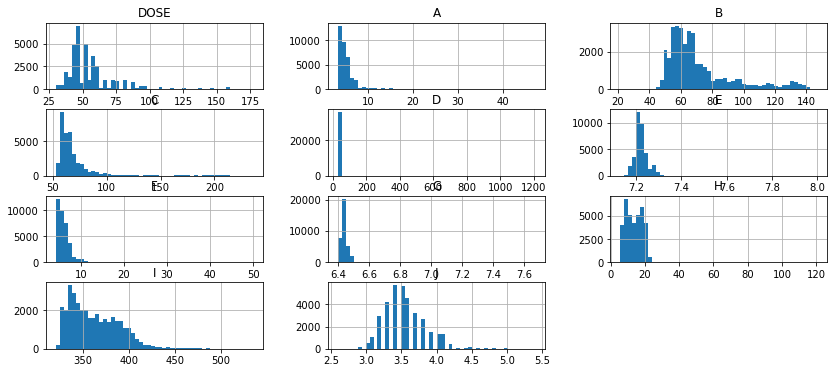

In [9]:
# handling anomalies

plants_dropna = plants.dropna()

plants_na = plants[plants.isnull().any(axis=1)]

# first check the feature distribution of each plant and all plants (rows without missing values)

# plot the distribution of column 'B'

plants_dropna[numeric_cols].hist(bins=50,figsize=[14,6])
# we can find D has anomalies from its distribution.

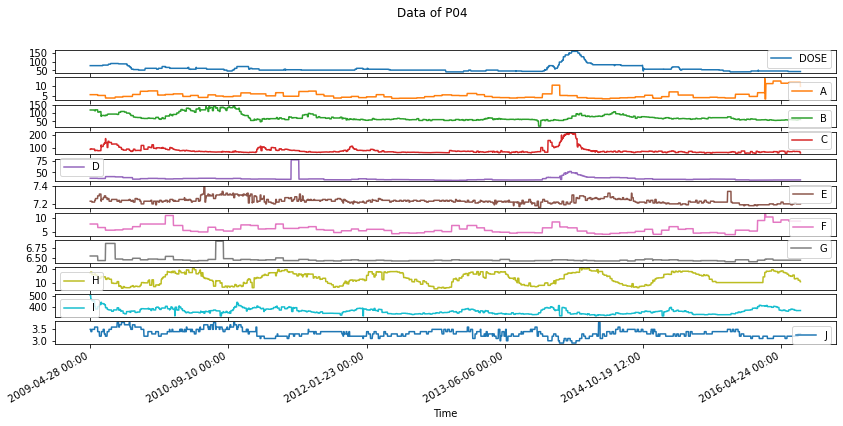

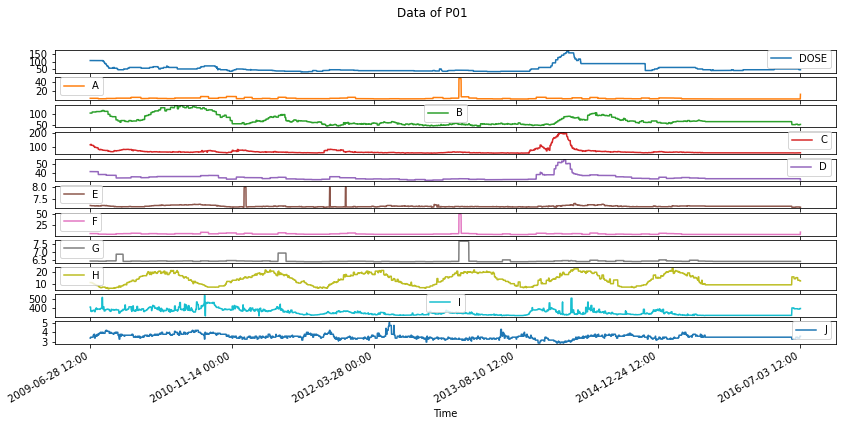

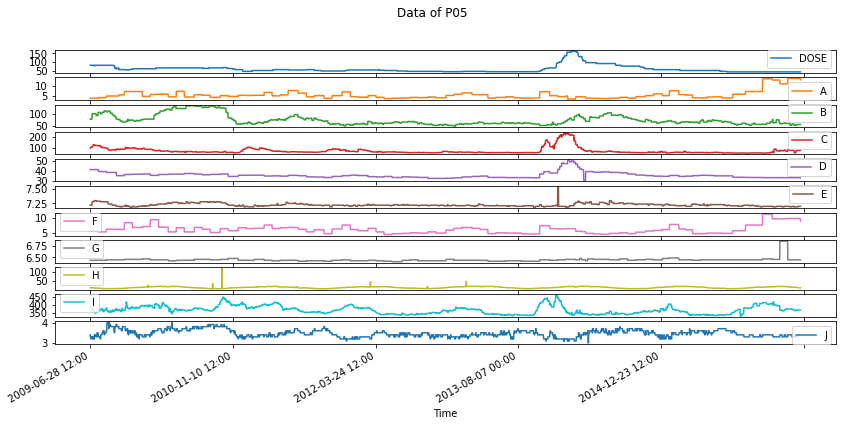

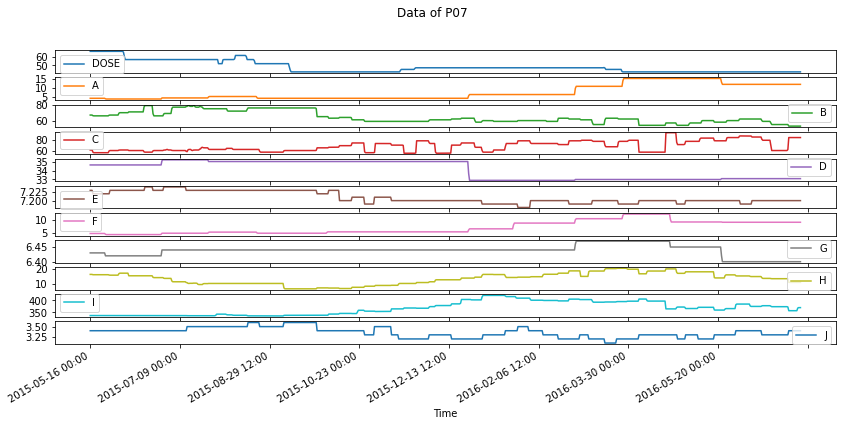

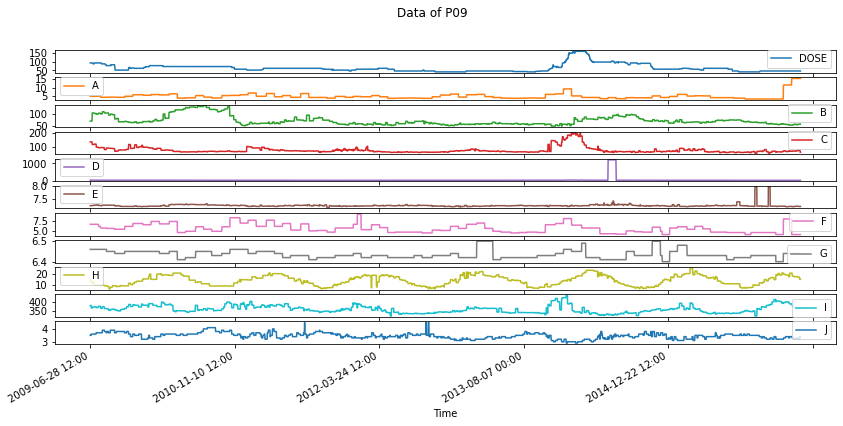

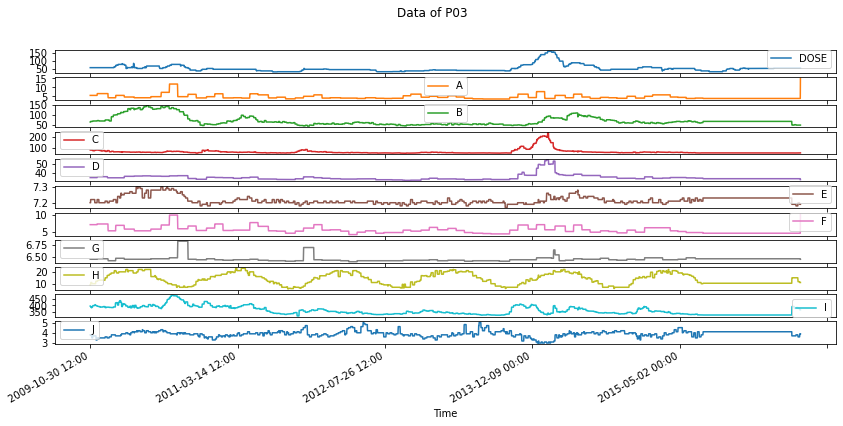

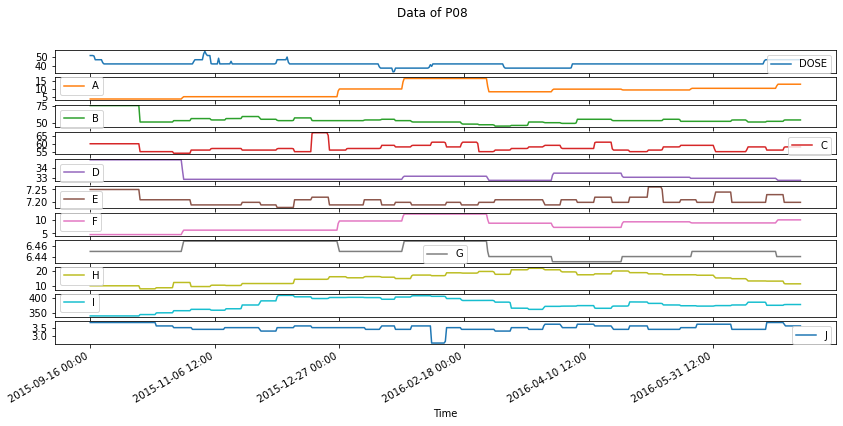

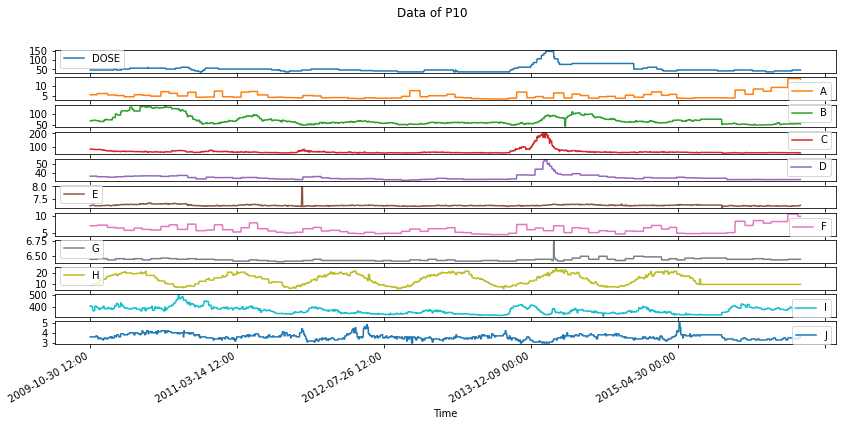

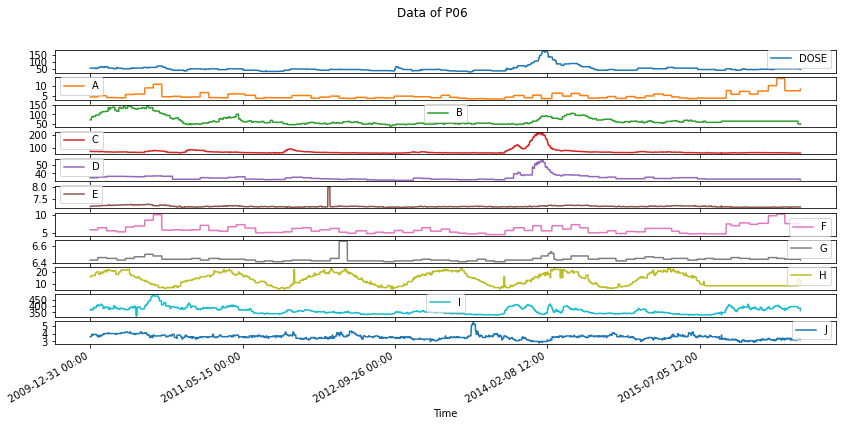

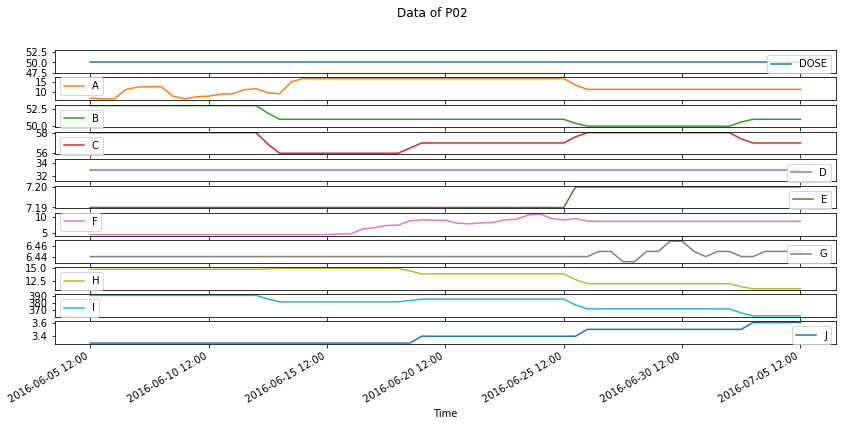

In [10]:
# time-serie plot for each plant
for p in plants_name:
    sub_plants = plants_dropna[plants_dropna['PLANT'] == p]
    plot_features = sub_plants[numeric_cols]
    date_time = sub_plants['Time']
    plot_features.index = date_time
    _ = plot_features.plot(figsize=[14,6], subplots=True,title=('Data of ' + p))

array([[<AxesSubplot:title={'center':'DOSE'}>,
        <AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>,
        <AxesSubplot:title={'center':'E'}>],
       [<AxesSubplot:title={'center':'F'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'I'}>,
        <AxesSubplot:title={'center':'J'}>, <AxesSubplot:>]], dtype=object)

array([[<AxesSubplot:title={'center':'DOSE'}>,
        <AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>,
        <AxesSubplot:title={'center':'E'}>],
       [<AxesSubplot:title={'center':'F'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'I'}>,
        <AxesSubplot:title={'center':'J'}>, <AxesSubplot:>]], dtype=object)

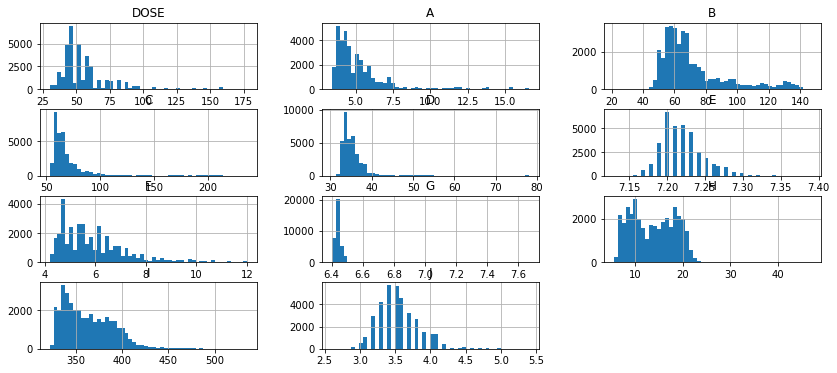

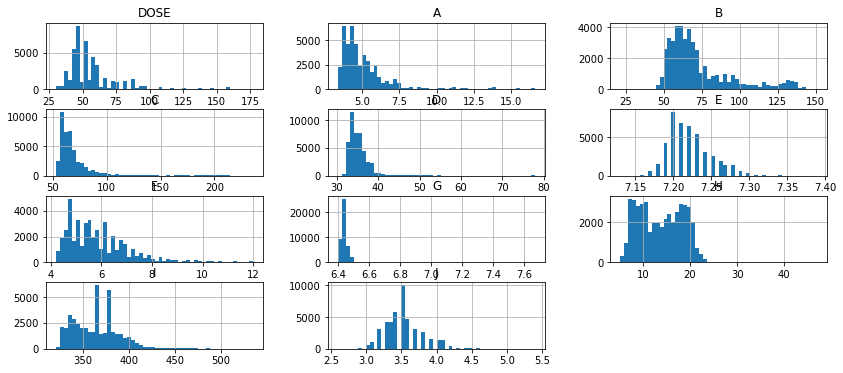

In [11]:
# replace anomalies with the mean of that column
# ‘A’ > 30
# ‘D’ > 200
# ‘E’ > 7.4
# ‘F’ > 20
# ‘H’ > 90

mean = plants_dropna.loc[plants_dropna['A']<=30, 'A'].mean()
plants['A'] = plants['A'].mask(plants['A'] >30, mean)
mean = plants_dropna.loc[plants_dropna['D']<=200, 'D'].mean()
plants['D'] = plants['D'].mask(plants['D'] >200, mean)
mean = plants_dropna.loc[plants_dropna['E']<=7.4, 'E'].mean()
plants['E'] = plants['E'].mask(plants['E'] >7.4, mean)
mean = plants_dropna.loc[plants_dropna['F']<=20, 'F'].mean()
plants['F'] = plants['F'].mask(plants['F'] >20, mean)
mean = plants_dropna.loc[plants_dropna['H']<=90, 'H'].mean()
plants['H'] = plants['H'].mask(plants['H'] >90, mean)

plants_dropna = plants.dropna()
plants_na = plants[plants.isnull().any(axis=1)]

plants_dropna[numeric_cols].hist(bins=50,figsize=[14,6])

# fix missing values using mean
for p in plants_name:
    sub_plants_dropna = plants_dropna[plants_dropna['PLANT']==p]
    sub_plants_na = plants_na[plants_na['PLANT']==p]
    if not sub_plants_na.empty:
        plants_na.loc[plants_na['PLANT']==p,:] = sub_plants_na.fillna(sub_plants_dropna.mean())
        
# merge plants_dropna and plants_na
new_plants = pd.concat([plants_dropna, plants_na], join="inner")

new_plants.sort_values(by='Time', inplace=True)

new_plants[numeric_cols].hist(bins=50,figsize=[14,6])

Text(0.5, 0.98, 'Dose vs Time')

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'DOSE')]

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'DOSE')]

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'DOSE')]

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'DOSE')]

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'DOSE')]

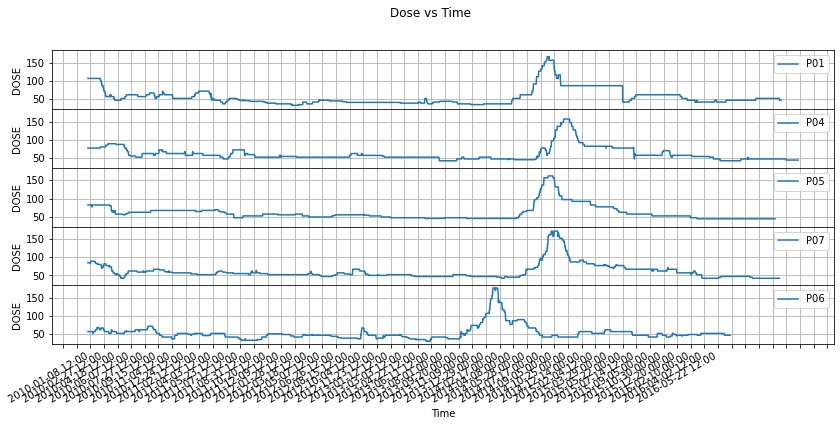

In [12]:
# plot dose vs date_time for different plants
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (14, 6)
mpl.rcParams['axes.grid'] = True

plants_name = plants['PLANT'].unique()
plants_name =['P01', 'P04', 'P05', 'P07', 'P06']
fig = plt.figure()
gs = fig.add_gridspec(len(plants_name), hspace=0)
ax = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Dose vs Time')

for i, p in zip(range(len(plants_name)), plants_name):
    
    sub_plants = plants[plants['PLANT'] == p]
    # Add x-axis and y-axis
    ax[i].plot(sub_plants['Time'],
            sub_plants['DOSE'])
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
    plt.gcf().autofmt_xdate()

    # Set title and labels for axes
    ax[i].set(xlabel="Time",
           ylabel="DOSE")
    
    ax[i].legend([p])

plt.show()


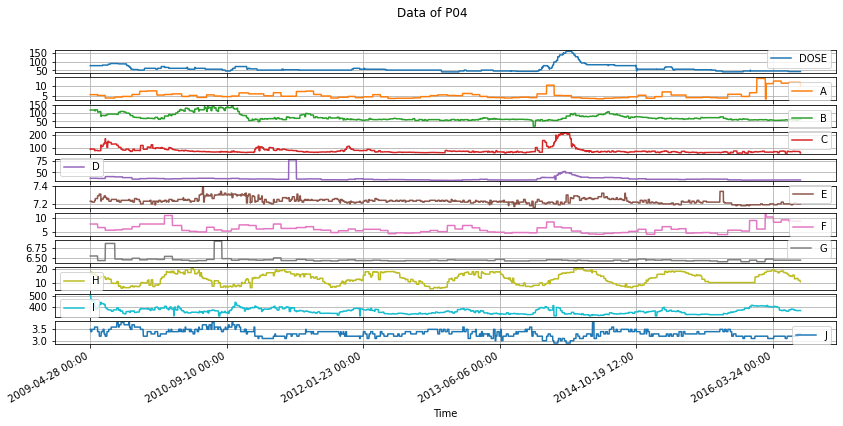

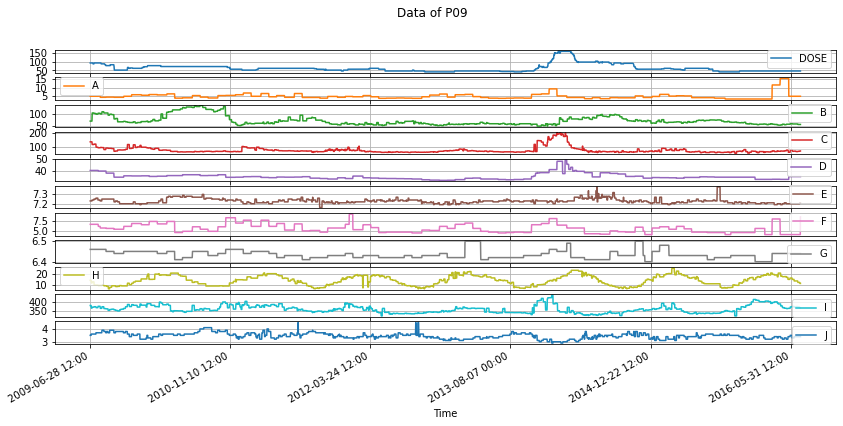

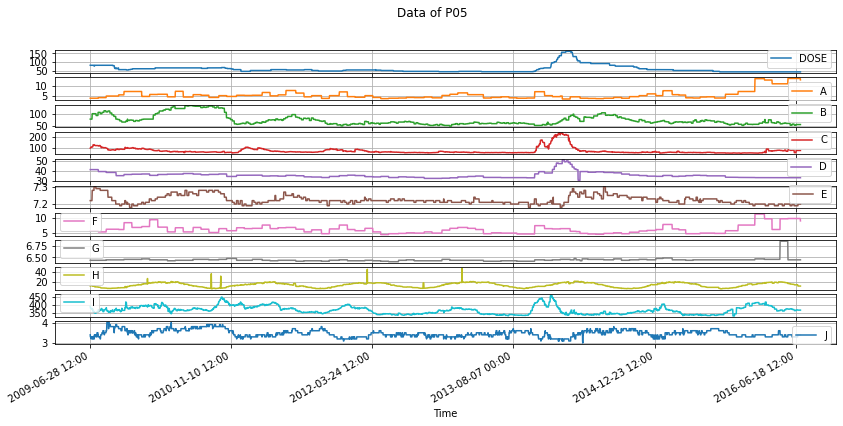

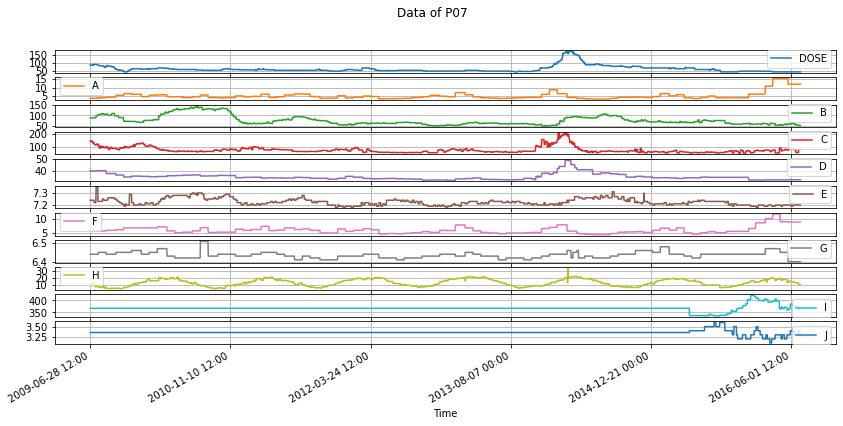

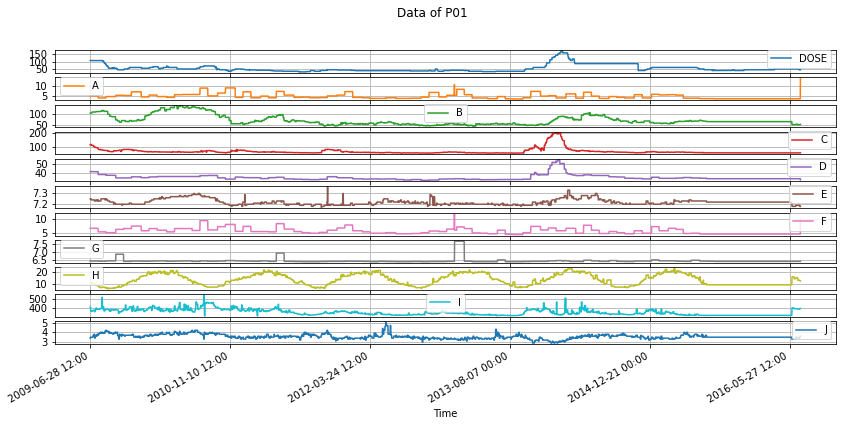

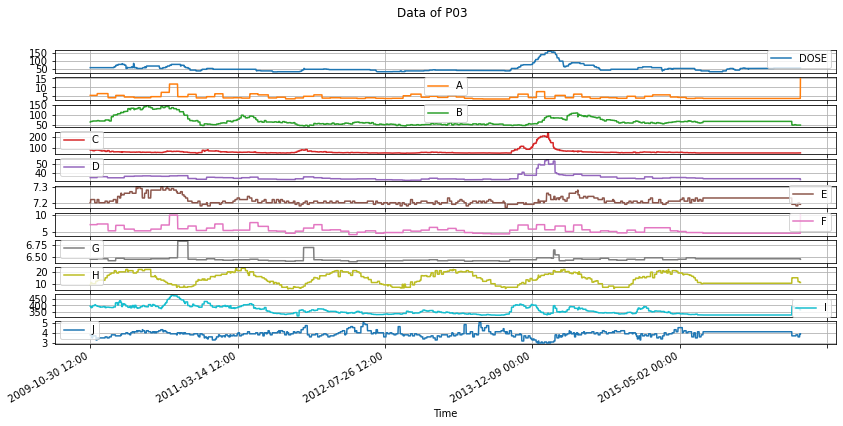

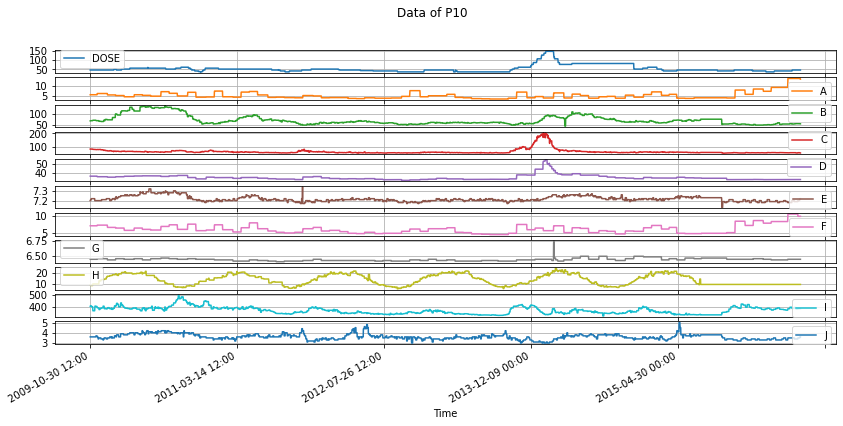

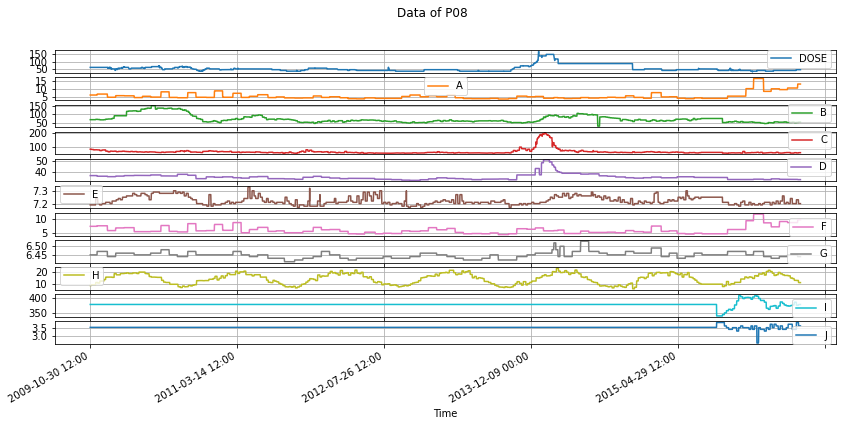

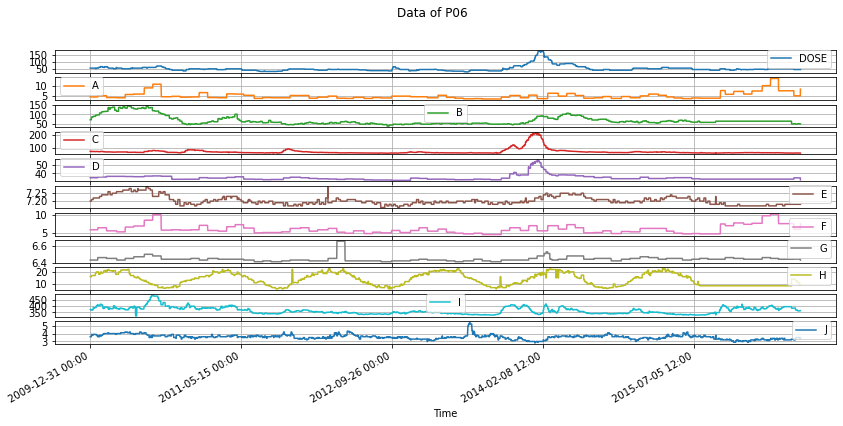

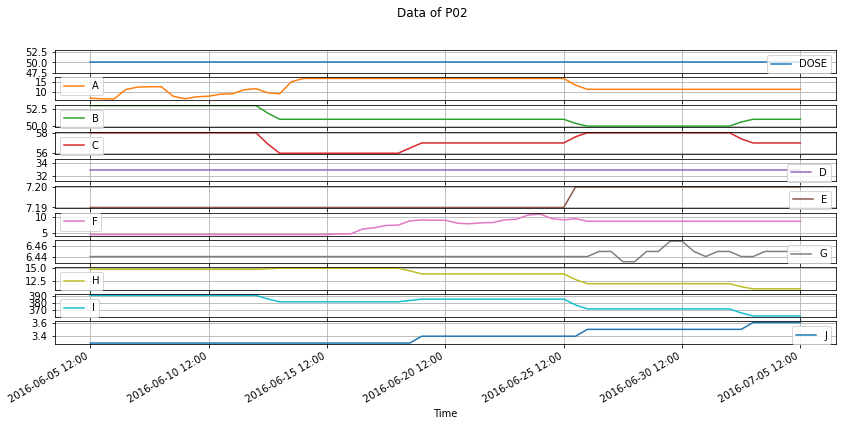

In [13]:
# time-series plot for each plant
plants_name = new_plants['PLANT'].unique()
for p in plants_name:
    sub_plants = new_plants[new_plants['PLANT'] == p]
    plot_features = sub_plants[numeric_cols]
    date_time = sub_plants['Time']
    plot_features.index = date_time
    _ = plot_features.plot(subplots=True,title=('Data of ' + p))

In [14]:
# get the year of each row
new_plants['Year'] = pd.to_datetime(new_plants['Time'], format='%Y-%m-%d %H:%M').dt.strftime('%Y')
new_plants['Year'] = new_plants['Year'].apply(pd.to_numeric)

new_plants['Hour'] = pd.to_datetime(new_plants['Time'], format='%Y-%m-%d %H:%M').dt.strftime('%H')
new_plants['Hour'] = new_plants['Hour'].apply(pd.to_numeric)

In [15]:
new_plants

,Time,PLANT,DOSE,A,B,C,D,E,F,G,H,I,J,Year,Hour
0,2009-04-28 00:00,P04,77.2,5.600000,120.0,86.0,37.000000,7.23,7.8,6.55,17.4,501.0,3.5,2009,0
1,2009-04-28 12:00,P04,77.2,5.600000,120.0,86.0,37.000000,7.23,7.8,6.55,17.4,501.0,3.5,2009,12
2,2009-04-29 00:00,P04,77.2,5.600000,120.0,86.0,37.000000,7.23,7.8,6.55,17.9,501.0,3.5,2009,0
3,2009-04-29 12:00,P04,77.2,5.600000,120.0,86.0,37.000000,7.23,7.8,6.55,18.0,501.0,3.5,2009,12
4,2009-04-30 00:00,P04,77.2,5.600000,120.0,89.5,37.000000,7.23,7.8,6.55,18.0,469.5,3.5,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44707,2016-07-05 12:00,P06,47.2,8.400000,52.0,56.0,32.700000,7.18,7.6,6.43,9.0,365.1,3.4,2016,12
44708,2016-07-05 12:00,P07,42.2,12.000000,53.0,85.0,33.100000,7.20,9.0,6.40,11.1,370.1,3.4,2016,12
44709,2016-07-05 12:00,P08,47.2,12.900000,54.0,58.0,32.800000,7.20,9.9,6.44,11.4,378.7,3.6,2016,12
44702,2016-07-05 12:00,P01,47.2,13.500000,53.0,58.0,32.700000,7.18,9.8,6.43,12.4,398.5,3.6,2016,12


In [16]:
# import pickle
# pickle.dump( new_plants, open( "plants.pkl", "wb" ) )

In [17]:
def generate_seq(df, numeric_cols, input_width, label_width=1):
    input_width = 2*input_width # there are two data in one day

    features = len(numeric_cols) # include year 

    # make sure the time starts from 0:00 at one day

    temp = np.zeros([input_width, features])

    j = df.shape[0] - 1
    while j >=1:

        i = j-1

        temp = np.zeros([input_width, features])
        k = 0
        cur_time = pd.to_datetime(df.iloc[i]['Time'], format='%Y-%m-%d %H:%M')

        while  k<input_width:
            if i-k>=0:
                k_time = pd.to_datetime(df.iloc[i-k]['Time'], format='%Y-%m-%d %H:%M')

                times = int((cur_time - k_time)/timedelta(hours=12))

                if input_width-1-times >=0:
                    temp[input_width-1-times, :] = df.iloc[i-k][numeric_cols].values
                else:
                    if j == df.shape[0]-1:
                        X = temp.reshape([1, input_width, features])
                        y = df.iloc[j:(j+label_width)]['DOSE'].values
                    else:
                        X = np.concatenate([X, temp.reshape([1, input_width, features])], axis=0)
                        y = np.concatenate([y, df.iloc[j:(j+label_width)]['DOSE'].values], axis=0)
                    break

                if k==input_width-1:
                    if j == df.shape[0]-1:
                        X = temp.reshape([1, input_width, features])
                        y = df.iloc[j:(j+label_width)]['DOSE'].values
                    else:
                        X = np.concatenate([X, temp.reshape([1, input_width, features])], axis=0)
                        y = np.concatenate([y, df.iloc[j:(j+label_width)]['DOSE'].values], axis=0)

            else:
                X = np.concatenate([X, temp.reshape([1, input_width, features])], axis=0)
                y = np.concatenate([y, df.iloc[j:(j+label_width)]['DOSE'].values], axis=0)
                break

            k += 1

        j -= 1
        
    return X, y

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, BatchNormalization, Bidirectional, LayerNormalization, Masking
from tensorflow.keras.optimizers import Adam
import re
from sklearn.preprocessing import StandardScaler

seed = 2021
tf.random.set_seed(seed)

Instructions for updating:
non-resource variables are not supported in the long term


In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='min',
    restore_best_weights=True)

METRICS = [tf.keras.losses.MeanAbsoluteError(), tf.keras.losses.MeanAbsolutePercentageError()]

In [20]:
new_plants['CDOSE'] = new_plants['DOSE']
new_plants = new_plants[['Time', 'PLANT', 'DOSE', 'Year', 'CDOSE', 'A', 'B', 'C', 'D', \
                       'E', 'F', 'G', 'H', 'I', 'J', 'Hour']]

In [21]:
new_plants.head()

,Time,PLANT,DOSE,Year,CDOSE,A,B,C,D,E,F,G,H,I,J,Hour
0,2009-04-28 00:00,P04,77.2,2009,77.2,5.6,120.0,86.0,37.0,7.23,7.8,6.55,17.4,501.0,3.5,0
1,2009-04-28 12:00,P04,77.2,2009,77.2,5.6,120.0,86.0,37.0,7.23,7.8,6.55,17.4,501.0,3.5,12
2,2009-04-29 00:00,P04,77.2,2009,77.2,5.6,120.0,86.0,37.0,7.23,7.8,6.55,17.9,501.0,3.5,0
3,2009-04-29 12:00,P04,77.2,2009,77.2,5.6,120.0,86.0,37.0,7.23,7.8,6.55,18.0,501.0,3.5,12
4,2009-04-30 00:00,P04,77.2,2009,77.2,5.6,120.0,89.5,37.0,7.23,7.8,6.55,18.0,469.5,3.5,0


In [22]:
# next I will train LSTM based on all plants data
train_years = [2009, 2010, 2011, 2012, 2013, 2014]
val_years = [2015]
test_years = [2016]

# do not perform normalization on 'DOSE' and 'Year'
norm_cols = ['CDOSE', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'Hour',]

# normalization dataframe (new_plants)
norm_plants = new_plants.copy()
train_table = norm_plants[norm_plants['Year'].isin(train_years)]
train_mean = train_table[norm_cols].mean()
train_std = train_table[norm_cols].std()
norm_plants[norm_cols] = (norm_plants[norm_cols]-train_mean)/train_std

In [23]:

for i, p in zip(range(len(plants_name)), plants_name):
    
    print('the plant name is %s'%p)
    
    plants_idv = norm_plants[norm_plants['PLANT']==p]

    X_idv, y_idv = generate_seq(plants_idv, numeric_cols=norm_plants.iloc[:,2:].columns,
                                input_width=7, label_width=1)
    print(X_idv.shape)
    print(y_idv.shape)
    if i == 0:
        X = X_idv
        y = y_idv
    else:
        X = np.concatenate((X, X_idv), axis=0)
        y = np.concatenate((y, y_idv), axis=0)

idx_noyear = list(range(2,14))
X_noyear = X[:,:,idx_noyear]

train_idx = np.where(np.isin(X[:,-1,1], np.array(train_years))==True)[0]
X_train = X_noyear[train_idx, :, :]
y_train = y[train_idx].reshape(-1,1)

val_idx = np.where(np.isin(X[:,-1,1], np.array(val_years))==True)[0]
X_val = X_noyear[val_idx, :, :]
y_val = y[val_idx].reshape(-1,1)

test_idx = np.where(np.isin(X[:,-1,1], np.array(test_years))==True)[0]
X_test = X_noyear[test_idx, :, :]
y_test = y[test_idx].reshape(-1,1)



the plant name is P04
(5203, 14, 14)
(5203,)
the plant name is P09
(5070, 14, 14)
(5070,)
the plant name is P05
(5034, 14, 14)
(5034,)
the plant name is P07
(5067, 14, 14)
(5067,)
the plant name is P01
(5078, 14, 14)
(5078,)
the plant name is P03
(4819, 14, 14)
(4819,)
the plant name is P10
(4834, 14, 14)
(4834,)
the plant name is P08
(4832, 14, 14)
(4832,)
the plant name is P06
(4705, 14, 14)
(4705,)
the plant name is P02
(60, 14, 14)
(60,)


In [24]:
X_train.shape

(35185, 14, 12)

In [25]:
X_val.shape

(6191, 14, 12)

In [26]:
X_test.shape

(3326, 14, 12)

In [27]:
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()
n_steps = X_train.shape[1]
n_features = X_train.shape[2]
model = Sequential()
model.add(Masking(mask_value=0.,
                                   input_shape=(n_steps, n_features))) 
model.add(LSTM(300, return_sequences=True, 
               dropout=0.1, recurrent_dropout=0.1))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(lr=0.001),metrics=METRICS)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 14, 12)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 14, 300)           375600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 445,851
Trainable params: 445,851
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
batch_size = 1024
my_callbacks = [early_stopping]

history = model.fit(X_train, y_train, epochs = 100, batch_size=batch_size, 
                    validation_data=(X_val, y_val), 
                    callbacks = my_callbacks,
                    verbose = 2, shuffle=True)

Train on 35185 samples, validate on 6191 samples
Epoch 1/100
35185/35185 - 20s - loss: 1482.3005 - mean_absolute_error: 28.8939 - mean_absolute_percentage_error: 50.7302 - val_loss: 149.8505 - val_mean_absolute_error: 9.9767 - val_mean_absolute_percentage_error: 19.0287
Epoch 2/100
35185/35185 - 20s - loss: 70.3992 - mean_absolute_error: 5.7012 - mean_absolute_percentage_error: 9.9152 - val_loss: 66.0601 - val_mean_absolute_error: 5.7182 - val_mean_absolute_percentage_error: 10.8347
Epoch 3/100
35185/35185 - 21s - loss: 51.7663 - mean_absolute_error: 4.5587 - mean_absolute_percentage_error: 7.8308 - val_loss: 51.6070 - val_mean_absolute_error: 5.3247 - val_mean_absolute_percentage_error: 10.0139
Epoch 4/100
35185/35185 - 23s - loss: 45.4263 - mean_absolute_error: 4.1876 - mean_absolute_percentage_error: 7.1730 - val_loss: 48.4873 - val_mean_absolute_error: 5.1046 - val_mean_absolute_percentage_error: 9.5377
Epoch 5/100
35185/35185 - 23s - loss: 41.4481 - mean_absolute_error: 3.9267 - m

Epoch 39/100
35185/35185 - 22s - loss: 9.4839 - mean_absolute_error: 1.5792 - mean_absolute_percentage_error: 2.7051 - val_loss: 7.8036 - val_mean_absolute_error: 2.0987 - val_mean_absolute_percentage_error: 4.3374
Epoch 40/100
35185/35185 - 23s - loss: 9.5080 - mean_absolute_error: 1.6327 - mean_absolute_percentage_error: 2.7349 - val_loss: 8.8888 - val_mean_absolute_error: 2.3214 - val_mean_absolute_percentage_error: 4.7722
Epoch 41/100
35185/35185 - 23s - loss: 8.8625 - mean_absolute_error: 1.5322 - mean_absolute_percentage_error: 2.5985 - val_loss: 7.1546 - val_mean_absolute_error: 1.9783 - val_mean_absolute_percentage_error: 4.2008
Epoch 42/100
35185/35185 - 23s - loss: 8.3564 - mean_absolute_error: 1.4223 - mean_absolute_percentage_error: 2.4288 - val_loss: 6.9900 - val_mean_absolute_error: 1.9317 - val_mean_absolute_percentage_error: 4.1069
Epoch 43/100
35185/35185 - 17s - loss: 8.1419 - mean_absolute_error: 1.4288 - mean_absolute_percentage_error: 2.4385 - val_loss: 5.6815 - va

Epoch 00076: early stopping


In [29]:
model.save("model.h5")

# load model
# model = tf.keras.models.load_model('model.h5', compile=False)
# summarize model.
# model.summary()

In [30]:
results = model.evaluate(X_test, y_test)
results

[7.874597099061408, 1.4875519, 3.305265]

In [31]:
results = model.evaluate(X_val, y_val)
results

[4.431756622363631, 1.4221861, 2.9615357]

In [32]:
results = model.evaluate(X_train, y_train)
results

[5.575221436625434, 1.3214358, 2.2996547]

In [33]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history, model):
    metrics = model.metrics_names
    plt.figure(figsize=(12, 8))
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        
        plt.subplot(3,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color='b', label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
             color='r', linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        plt.legend()
    plt.show()

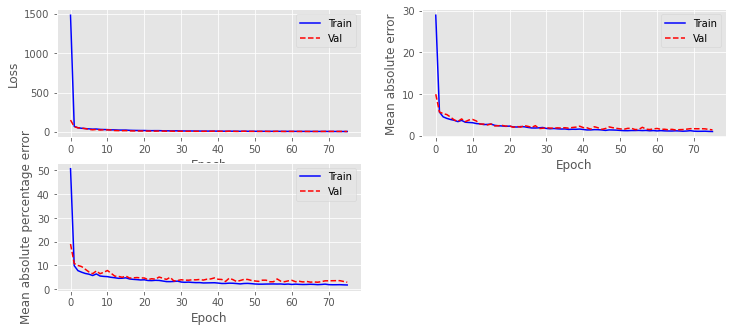

In [34]:
plot_history(history, model)

In [40]:
# 
P = 'P09'
plants_idv = norm_plants[norm_plants['PLANT']==P]
X_idv, y_idv = generate_seq(plants_idv, numeric_cols=norm_plants.iloc[:,2:].columns,
                            input_width=7, label_width=1)
print(X_idv.shape)
print(y_idv.shape)

X_actual = X_idv[:,:,idx_noyear]
y_actual = y_idv.reshape(-1,1)

y_pred = model.predict(X_actual)



(5070, 14, 14)
(5070,)


Text(0, 0.5, 'DOSE')

Text(0.5, 1.0, 'Dose vs Time P09')

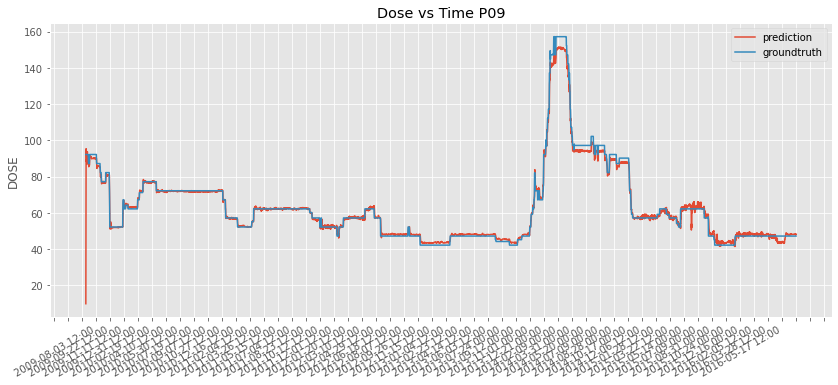

In [41]:
# plot time-series prediction
fig = plt.figure()
cutoff = np.where(norm_plants['PLANT'] == P)
cutoff = cutoff[0][1:]
plt.plot(norm_plants.iloc[cutoff]['Time'], y_pred[::-1])
plt.plot(norm_plants.iloc[cutoff]['Time'], y_actual[::-1])

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.legend(['prediction', 'groundtruth'])
plt.ylabel('DOSE')
plt.title('Dose vs Time P09')
plt.show()

In [37]:
import shap
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
e = shap.DeepExplainer(model, background)

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 0')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 1')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 2')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 3')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 4')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 5')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 6')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 7')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 8')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 9')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 10')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 11')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 12')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 13')

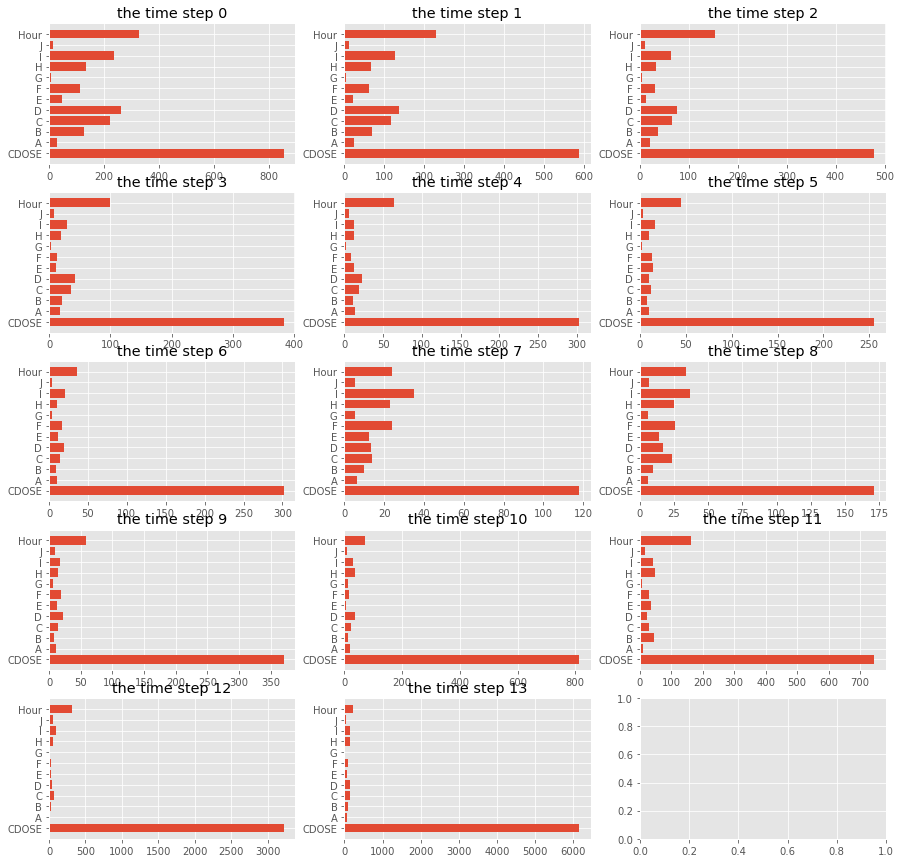

In [38]:
X_train_sub = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]
shap_values = e.shap_values(X_train_sub, check_additivity=False)
shap_val = np.array(shap_values)
shap_val = np.reshape(shap_val,(int(shap_val.shape[1]),int(shap_val.shape[2]),int(shap_val.shape[3])))
shap_abs = np.absolute(shap_val)
sum_0 = np.sum(shap_abs,axis=0)
f_names = norm_plants.iloc[:,4:].columns.tolist()
x_pos = [i for i, _ in enumerate(f_names)]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))

for i in range(n_steps):
    axes[i//3, i%3].barh(x_pos,sum_0[i])
    axes[i//3, i%3].set_yticks(x_pos)
    axes[i//3, i%3].set_yticklabels(f_names)
    axes[i//3, i%3].set_title('the time step ' + str(i))

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 0')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 1')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 2')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 3')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 4')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 5')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 6')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 7')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 8')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 9')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 10')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 11')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 12')

<BarContainer object of 12 artists>

[Text(0, 0, 'CDOSE'),
 Text(0, 1, 'A'),
 Text(0, 2, 'B'),
 Text(0, 3, 'C'),
 Text(0, 4, 'D'),
 Text(0, 5, 'E'),
 Text(0, 6, 'F'),
 Text(0, 7, 'G'),
 Text(0, 8, 'H'),
 Text(0, 9, 'I'),
 Text(0, 10, 'J'),
 Text(0, 11, 'Hour')]

Text(0.5, 1.0, 'the time step 13')

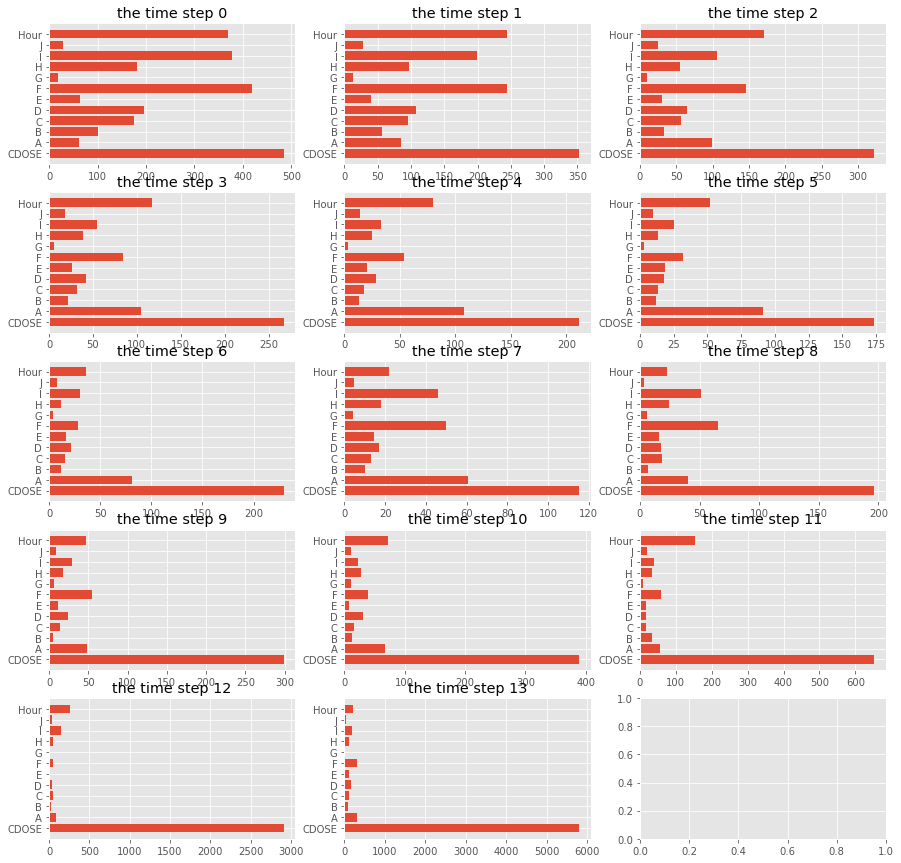

In [39]:
X_test_sub = X_test[np.random.choice(X_test.shape[0], 1000, replace=False)]
shap_values = e.shap_values(X_test_sub, check_additivity=False)
shap_val = np.array(shap_values)
shap_val = np.reshape(shap_val,(int(shap_val.shape[1]),int(shap_val.shape[2]),int(shap_val.shape[3])))
shap_abs = np.absolute(shap_val)
sum_0 = np.sum(shap_abs,axis=0)
f_names = norm_plants.iloc[:,4:].columns.tolist()
x_pos = [i for i, _ in enumerate(f_names)]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))

for i in range(n_steps):
    axes[i//3, i%3].barh(x_pos,sum_0[i])
    axes[i//3, i%3].set_yticks(x_pos)
    axes[i//3, i%3].set_yticklabels(f_names)
    axes[i//3, i%3].set_title('the time step ' + str(i))